## Objective of project

* This project is aimed at developing a machine learning model to classify breast cancer tumors as either benign or malignant based on various features extracted from breast biopsy data. \
* The K-Nearest Neighbors (KNN) algorithm is employed for this binary classification task.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load the Dataset

In [2]:
df = pd.read_csv(r'D:\7.30 PM DATA SCIENCE AND AI\DAILY SESSION MATERIALS\OCT\5th\projects\KNN\brest cancer.txt', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

## 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Rename columns

In [6]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 1. Drop redundant columns

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


We can see that there are 9 numerical variables and 1 categorical variable in the dataset

In [10]:
df.shape

(699, 10)

### 2. Frequency distribution of values in variables

In [11]:
for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

### 3. Convert data type of Bare_Nuclei to integer

In [12]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

### 4. Check data types of columns

In [13]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

### 5. Check missing values in variables

In [14]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [15]:
df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [16]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [17]:
df['Bare_Nuclei'].isna().sum()

16

* We can see that there are 16 nan values in the dataset.\
* Will impute missing values after dividing the dataset into training and test set.

### 6. Check frequency distribution of target variable Class

In [18]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### 7. Check percentage of frequency distribution of Class

In [19]:
df['Class'].value_counts()/float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

* 2 stands for 'Benign' and 4 stands for 'Malignant Cancer'

### 8. Outliers in numerical variables

In [20]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

## 4. Data Visualization

### 1. Univariate plots

* Plot histograms of the variables

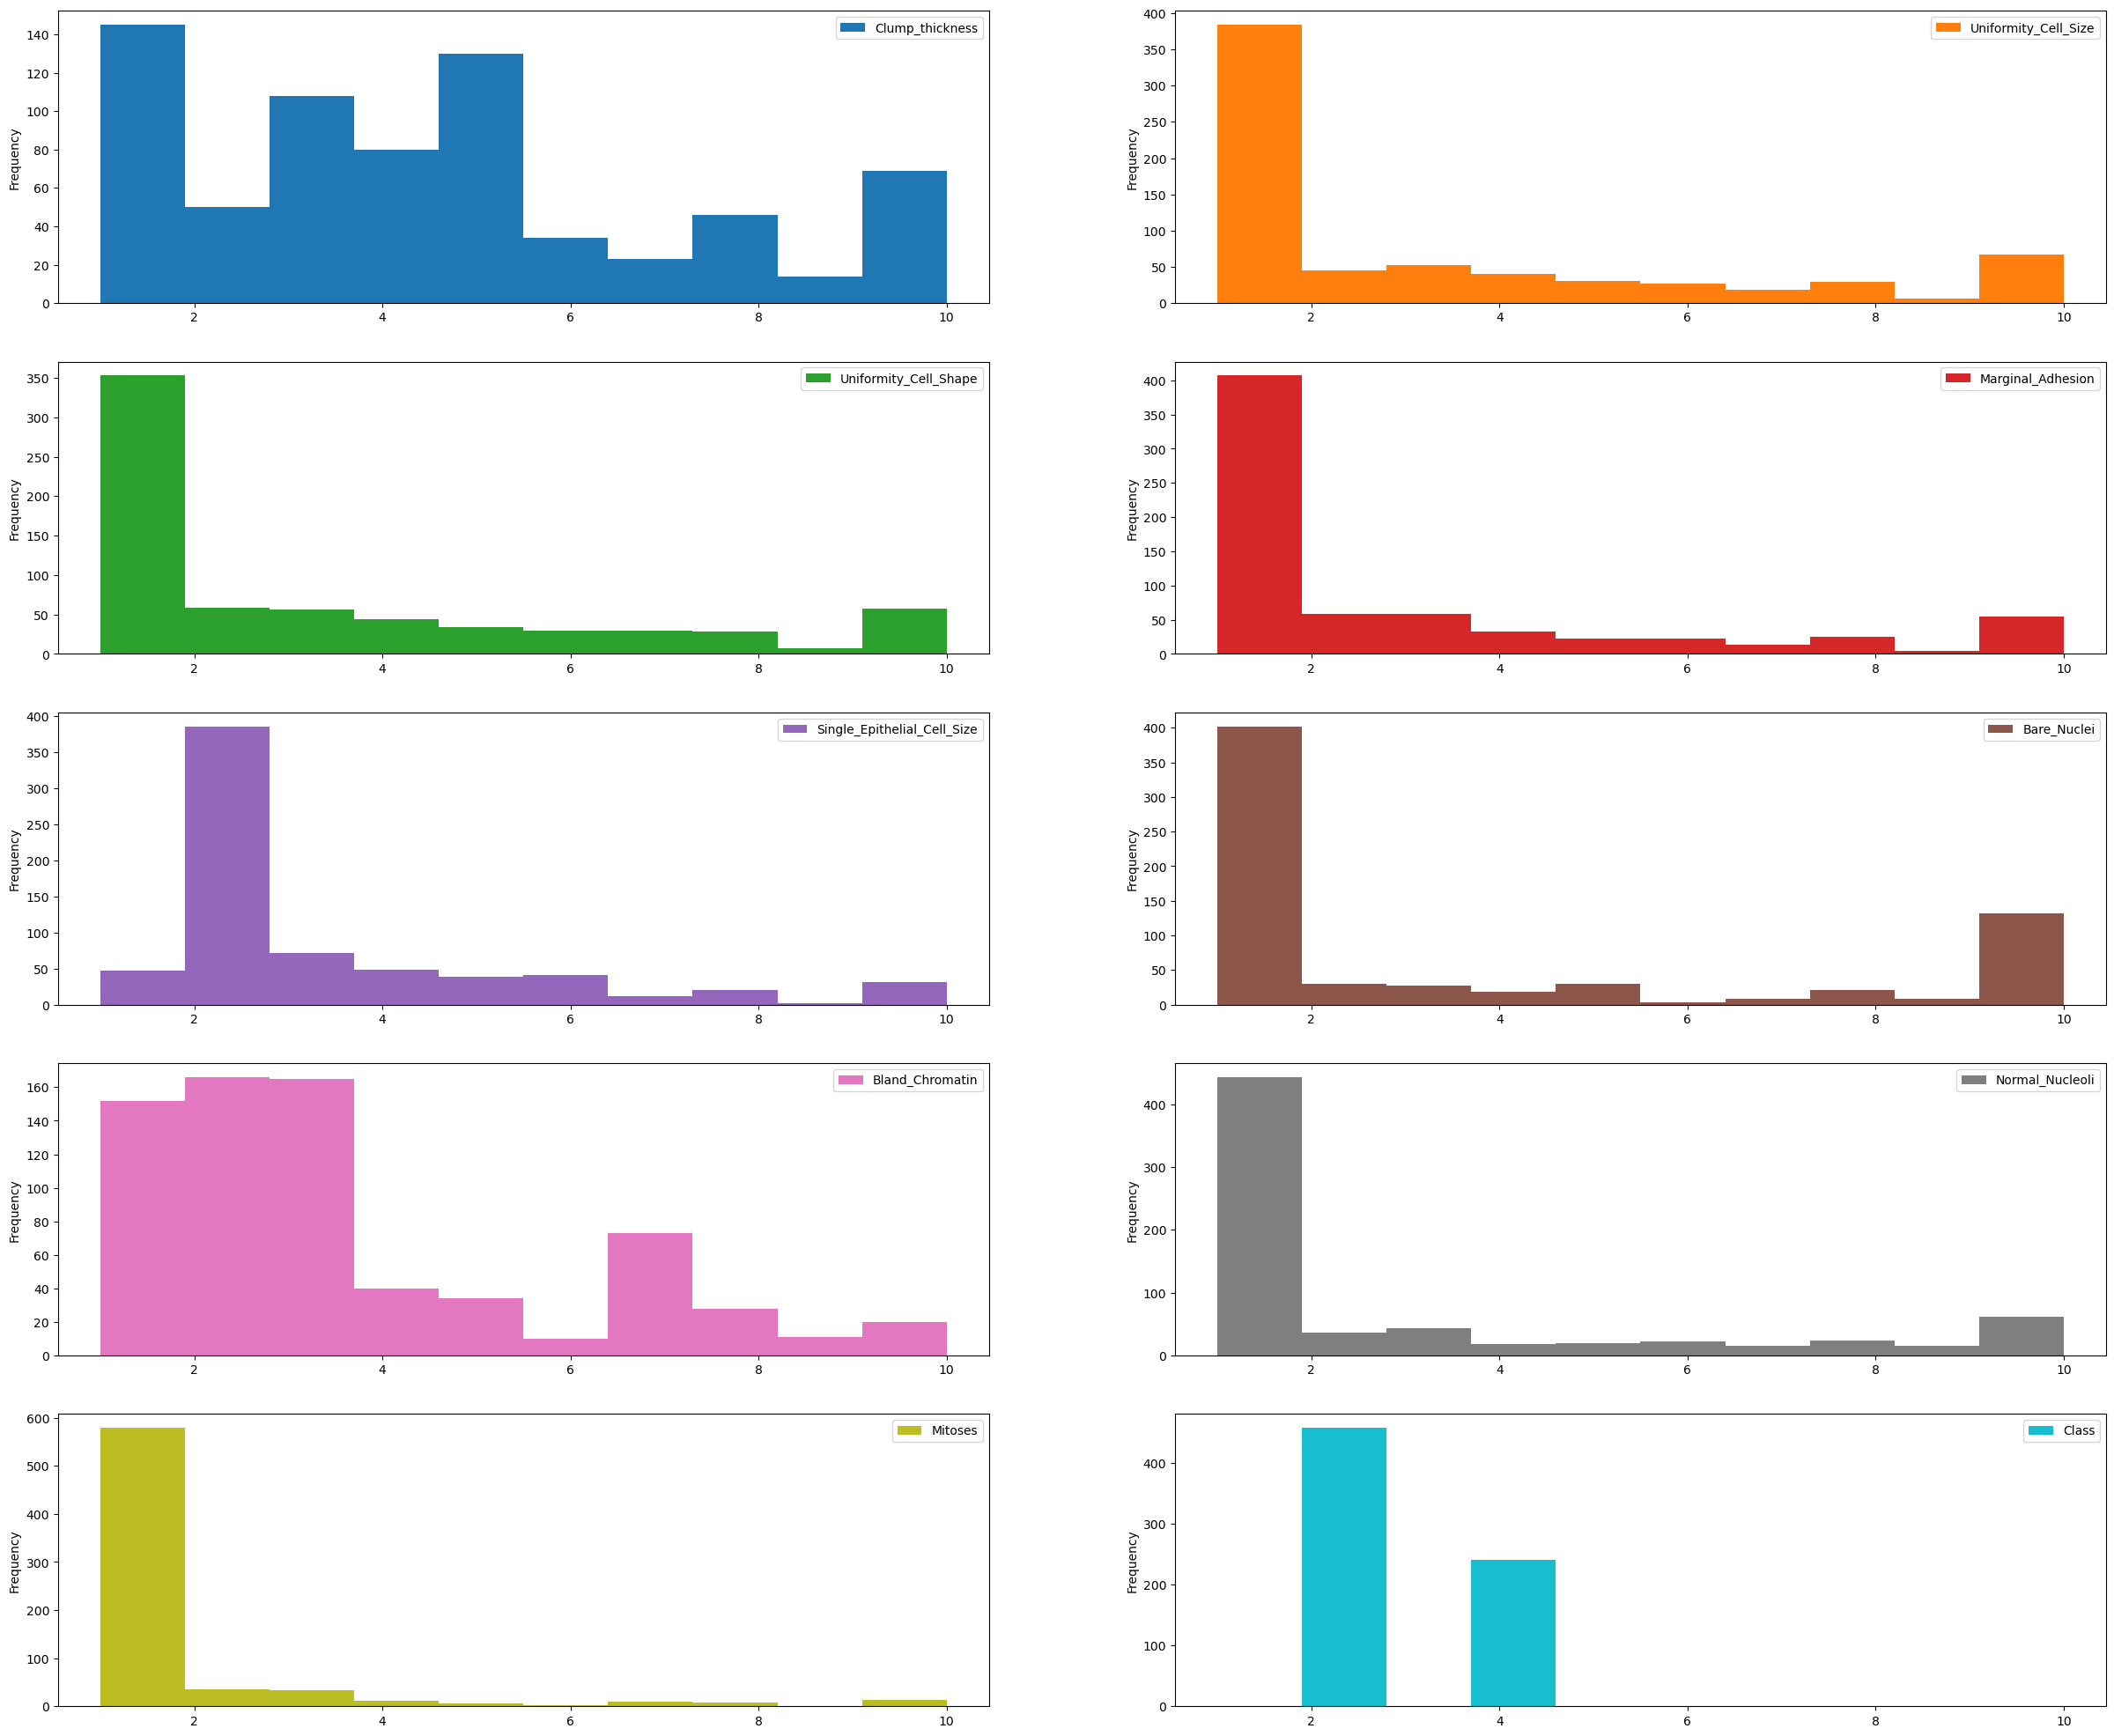

In [21]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

* We can see that all the variables in the dataset are positively skewed.

### 2. Multivariate Plots

In [22]:
correlation = df.corr()

* Our target variable is Class. So, we should check how each attribute correlates with the Class variable

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

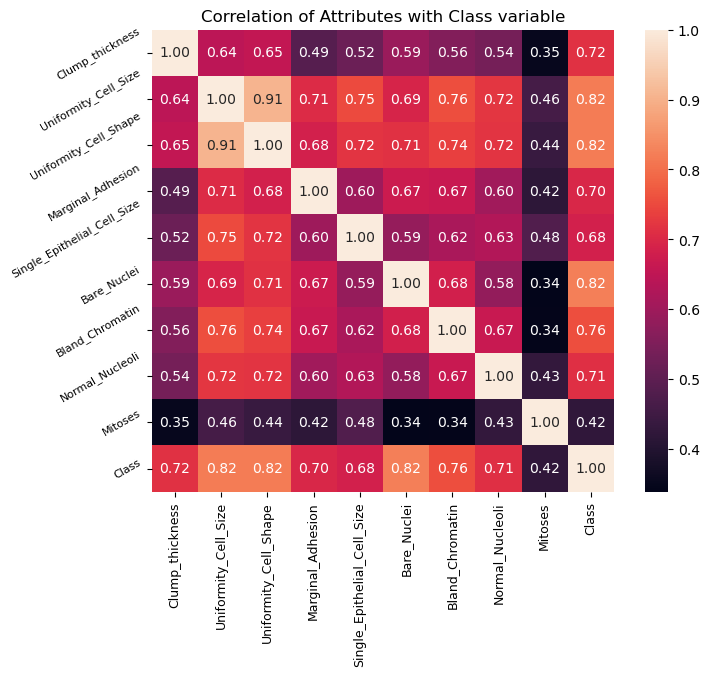

In [24]:
plt.figure(figsize=(8,6))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90, fontdict={'fontsize': 9})
a.set_yticklabels(a.get_yticklabels(), rotation=30, fontdict={'fontsize': 8})
plt.show()

### Interpretations:
From the above correlation heat map, we can conclude that :-

1.Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

2.Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

3.Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

## 5. Declare independent and dependent variable

In [25]:
X = df.drop('Class', axis=1)
y = df['Class']

## 6. Split the dataset into Training and Test Set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [27]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

## 7. Feature Engineering

In [28]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [29]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [30]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

###  Percentage of missing values in the numerical variables in training set

In [31]:
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


## 8. Impute missing values in X_train and X_test with respective column median in X_train

In [32]:
for df1 in [X_train,X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [33]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [35]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [36]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


## 9. Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
cols = X_train.columns

In [39]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [40]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [41]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


## 10. Implement K-Nearest Neighbor Algorithm

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)

In [43]:
knc.fit(X_train, y_train)

y_pred_knc = knc.predict(X_test)

In [44]:
y_pred_knc

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

### predict_proba method

In [45]:
# Probability of getting output as 2 - benign cancer

knc.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [46]:
# Probability of getting output as 4 - Malignant Cancer

knc.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

## 11. Check Accuracy score

In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_knc)
acc

0.9714285714285714

## 12. Compare the train-set and test-set accuracy

In [48]:
y_pred_train = knc.predict(X_train)

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


In [50]:
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knc)))

Testing-set accuracy score: 0.9714


## 13. Check Overfitting and Underfitting

In [51]:
bias = knc.score(X_train, y_train)
bias

0.9821109123434705

In [52]:
variance = knc.score(X_test, y_test)
variance

0.9714285714285714

* Above two values are quite comparable. So, there is no question of overfitting.

## 14. Compare model accuracy with null accuracy

* Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

* So, we should first check the class distribution in the test set.

In [53]:
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [54]:
# check null accuracy score

null_acc = 85/(85+55)

print('The Null Accuracy is : {0:0.4f}'.format(null_acc))

The Null Accuracy is : 0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

## 15. Rebuild K-NN Classification model using different values of k

### 1. Rebuild K-NN Classification model using k=5

In [55]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

y_pred_knn5 = knn_5.predict(X_test)

In [56]:
print('The Accuracy score with k=5 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn5)))

The Accuracy score with k=5 : 0.9714


### 2. Rebuild K-NN Classification model using k=6

In [57]:
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_train, y_train)

y_pred_knn6 = knn_6.predict(X_test)

In [58]:
print('The Accuracy score with k=6 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn6)))

The Accuracy score with k=6 : 0.9786


### 3. Rebuild K-NN Classification model using k=7

In [59]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_7.fit(X_train, y_train)

y_pred_knn7 = knn_7.predict(X_test)

In [60]:
print('The Accuracy score with k=7 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn7)))

The Accuracy score with k=7 : 0.9786


### 4. Rebuild K-NN Classification model using k=8

In [61]:
knn_8 = KNeighborsClassifier(n_neighbors=8)

knn_8.fit(X_train, y_train)

y_pred_knn8 = knn_8.predict(X_test)

In [62]:
print('The Accuracy score with k=8 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn8)))

The Accuracy score with k=8 : 0.9786


### 5. Rebuild K-NN Classification model using k=9

In [63]:
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_9.fit(X_train, y_train)

y_pred_knn9 = knn_9.predict(X_test)

In [64]:
print('The Accuracy score with k=9 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn9)))

The Accuracy score with k=9 : 0.9714


Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.

With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.

If we increase k to 9, then accuracy decreases again to 0.9714.

## 16. Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knc)
cm

array([[83,  2],
       [ 2, 53]], dtype=int64)

In [66]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


The confusion matrix shows 82 + 54 = 136 correct predictions and 3 + 1 = 4 incorrect predictions

*True Positives (Actual Positive and Predict Positive) - 82

*True Negatives (Actual Negative and Predict Negative) - 54

*False Positives (Actual Negative but Predict Positive) - 3 (Type I error)

*False Negatives (Actual Positive but Predict Negative) - 1 (Type II error)


### Print the Confusion Matrix with k =7

In [67]:
cm7 = confusion_matrix(y_test, y_pred_knn7)
cm7

array([[83,  2],
       [ 1, 54]], dtype=int64)

In [68]:
print('\nTrue Positives(TP) = ', cm7[0,0])

print('\nTrue Negatives(TN) = ', cm7[1,1])

print('\nFalse Positives(FP) = ', cm7[0,1])

print('\nFalse Negatives(FN) = ', cm7[1,0])


True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


The above confusion matrix shows 83 + 54 = 137 correct predictions and 2 + 1 = 3 incorrect predictions

*True Positives (Actual Positive and Predict Positive) - 83

*True Negatives (Actual Negative and Predict Negative) - 54

*False Positives (Actual Negative but Predict Positive) - 2 (Type I error)

*False Negatives (Actual Positive but Predict Negative) - 1 (Type II error)

## Comment

* K-NN Classification model with k=7 shows more accurate predictions.

## 17. Visualize confusion matrix with seaborn heatmap

<Axes: >

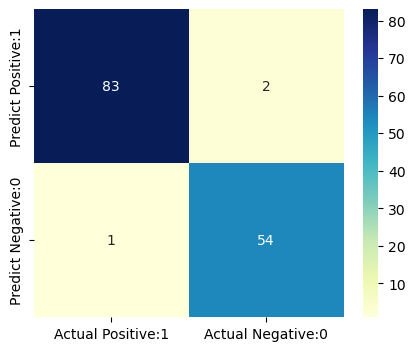

In [69]:
plt.figure(figsize=(5,4))

cm_matrix = pd.DataFrame(data=cm7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 18. Classification Metrices

### 1. Classification Report

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



### 2. Classification Accuracy

In [71]:
TP = cm7[0,0]
TN = cm7[1,1]
FP = cm7[0,1]
FN = cm7[1,0]

In [72]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


### 3. Classification Error

In [73]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


### 4. Precision

Precision identifies the proportion of correctly predicted positive outcome

In [74]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


### 5. Recall

Recall identifies the proportion of correctly predicted actual positives

In [75]:
recall = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.9881


### 6. True Positive Rate

True Positive Rate is synonymous with Recall.

In [76]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9881


### 7. False Positive Rate

In [77]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0357


### 8. Specificity

In [78]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9643


## Adjusting the classification threshold level

In [79]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knc.predict_proba(X_test)[0:10]
y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

### Observations

*There is a classification threshold level of 0.5.

*Class 4 - probability of malignant cancer is predicted if probability > 0.5.

*Class 2 - probability of benign cancer is predicted if probability < 0.5.

## 19. Store the probabilities in Dataframe

In [80]:
y_pred_prob_df = pd.DataFrame(y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


## 20. Predicted probabilities for class 4 - Probability of malignant cancer

In [81]:
y_pred_class4 = knc.predict_proba(X_test)[:, 1]
y_pred_class4

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

## 21. Plot the Histogram

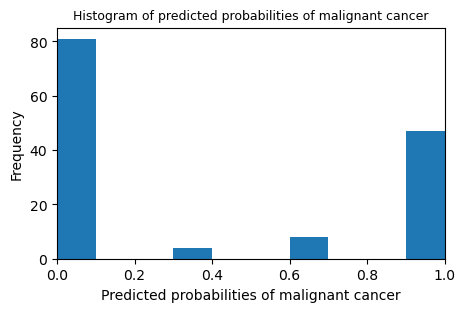

In [82]:
plt.figure(figsize=(5,3))
plt.title('Histogram of predicted probabilities of malignant cancer', fontdict={'fontsize':9})
plt.hist(y_pred_class4, bins=10)
plt.xlim(0,1)

plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')
plt.show()

### Observations

*We can see that the above histogram is positively skewed

*The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer

*There are few observations with probability > 0.5

## 22. ROC Curve

ROC-AUC is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class4, pos_label=4)

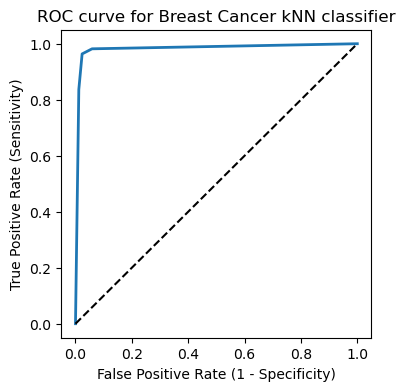

In [84]:
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## 23. ROC-AUC

A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [85]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_class4)
print('ROC AUC : {0:0.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

## 24. Results and Conclusion

1.In this project, I build a K-NN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

2.With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

3.I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

4.Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

5.K-NN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

6.ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.